<a href="https://colab.research.google.com/github/px70339sai/Data690_Sai/blob/main/assignment_04/assignment_04_HW_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('census_costs.txt', sep="\t")
df

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


In [26]:
df.shape

(23, 4)

df.shape gives rows & columns

i.e 23 Rows & 4 Columns


## Displaying First 10 Rows

In [27]:
df.head(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


## Displaying Random 10 Rows

In [28]:
df.sample(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
17,1960,"179,323,175","$127,934,000",71.34 cents
15,1940,"131,669,275","$67,527,000",51.29 cents
0,1790,"3,929,214","$44,377",1.13 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
1,1800,"5,308,483","$66,109",1.24 cents
5,1840,"17,069,458","$833,371",4.88 cents
10,1890,"62,979,766","$11,547,127",18.33 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
16,1950,"151,325,798","$91,462,000",60.44 cents
22,2010*,"308,745,538",$13 Billion,$42.11


## Info to get dayatypes of all columns

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Census Year              23 non-null     object
 1   Total Population         23 non-null     object
 2   Census Cost              23 non-null     object
 3   Average Cost Per Person  23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


## Summary Statistics

In [30]:
df.describe(include='all')

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23,23,23,23
unique,23,23,23,23
top,1830,"122,775,046","$5,790,678",$4.76
freq,1,1,1,1


In [33]:
# use apply function to cleanse data

def cleanse_data(values):
    data = str(values).replace("*","").replace(",","").replace("$","").replace("\t","")
    return data


def clean_census_cost(values):
  if 'Billion' in values:
    values = float(str(values).replace(" Billion",""))
    values = int(float(values)  * 1000000000)
  return values

def clean_avg_cost(values):
  if 'cents' in values:
    values = float(str(values).replace(" cents", ""))
    values = round(float(values / 100), 4)
  return values


In [34]:
df["Census Year"] = df["Census Year"].apply(cleanse_data)
df['Census Year'] = pd.to_numeric(df['Census Year'])

df["Total Population"] = df["Total Population"].apply(cleanse_data)
df['Total Population'] = pd.to_numeric(df['Total Population'])


df["Census Cost"] = df["Census Cost"].apply(clean_census_cost)
df['Census Cost'] = pd.to_numeric(df['Census Cost'])


df["Average Cost Per Person"] = df["Average Cost Per Person"].apply(clean_avg_cost)
df['Average Cost Per Person'] = pd.to_numeric(df['Average Cost Per Person'])

df



,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,3929214,44377,0.0113
1,1800,5308483,66109,0.0124
2,1810,7239881,178445,0.0246
3,1820,9633822,208526,0.0216
4,1830,12866020,378545,0.0294
5,1840,17069458,833371,0.0488
6,1850,23191876,1423351,0.0614
7,1860,31443321,1969377,0.0626
8,1870,38558371,3421198,0.0887
9,1880,50155783,5790678,0.1154


In [35]:
# summary statistics using describe
df.describe()

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23.0000,2.300000e+01,2.300000e+01,23.000000
mean,1900.0000,1.039211e+08,9.445587e+08,3.368739
std,67.8233,9.622629e+07,2.830037e+09,9.278241
min,1790.0000,3.929214e+06,4.437700e+04,0.011300
25%,1845.0000,2.013067e+07,1.128361e+06,0.055100
50%,1900.0000,7.630339e+07,1.185400e+07,0.170700
75%,1955.0000,1.653245e+08,1.096980e+08,0.658900
max,2010.0000,3.087455e+08,1.300000e+10,42.110000


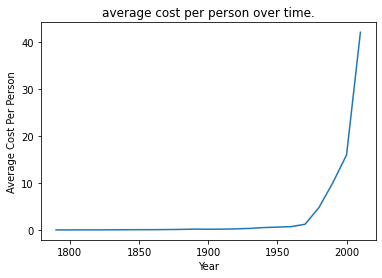

In [36]:
import matplotlib.pyplot as plt

x = df['Census Year']
y = df['Average Cost Per Person']
plt.plot(x,y)
plt.xlabel('Year')
plt.ylabel('Average Cost Per Person')
plt.title('average cost per person over time.')

plt.show()


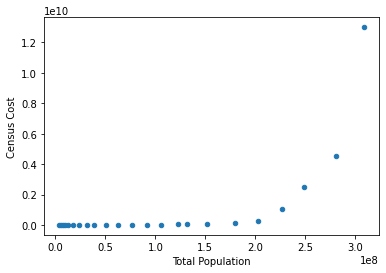

In [37]:
df.plot.scatter(x="Total Population", y="Census Cost")